Remember that you need to get the email address from the JSON key and add that as a user in the Google Sheet
pulling-crm-data-to-master-dat@dealer-world-data.iam.gserviceaccount.com

In [222]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
#%matplotlib inline

scope = ["https://spreadsheets.google.com/feeds",
         "https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive.file",
         "https://www.googleapis.com/auth/drive"]

creds = ServiceAccountCredentials.from_json_keyfile_name("dealer-world-data-16192d1e4c48.json", scope)
gc = gspread.authorize(creds)

client_list_original = gc.open_by_key('1_j31PwyFsTx0SPBIywvnOd7E3UbjUCFfAFIZkCOMr1g').sheet1.get_all_records()
ids = pd.DataFrame(client_list_original)
client_list = ids['Dealer Leads ID'].tolist()

In [189]:
master_df = pd.DataFrame()

for i in range(len(client_list)):
    try:
        sheet = gc.open_by_key(client_list[i]).worksheet("Dealer Leads")
        data = sheet.get_all_records()
        df = pd.DataFrame(data)
        master_df = master_df.append(df, ignore_index=True, sort=True)
    except:
        print(ids[ids['Dealer Leads ID'] == client_list[i]][['Client']]+' did not import correctly')

In [190]:
#Dropping Empty Columns
master_df.drop(columns={''}, inplace=True)

In [191]:
master_df.dtypes

Avg. Response Time    object
Closing Percent       object
DealerName            object
Entry Date            object
Fresh Walk Ins        object
Internet Leads        object
Internet Set          object
Internet Show         object
Internet Sold         object
Phone Leads           object
Phone Set             object
Phone Show            object
Phone Sold            object
Showroom Visits       object
Units Sold            object
dtype: object

In [192]:
#Closing to Float
master_df['Closing Percent'] = master_df['Closing Percent'].replace('#DIV/0!','NaN').replace('','NaN').astype(float)

In [193]:
#Avg. Response Time to Float
master_df['Avg. Response Time'] = master_df['Avg. Response Time'].replace('','NaN').astype(float)

In [194]:
def str_to_int(column):
    master_df[column] = master_df[column].replace(' ','').replace('','0').astype(int)
    
int_columns = ['Fresh Walk Ins',
               'Internet Leads',
               'Internet Set',
               'Internet Show',
               'Internet Sold',
               'Phone Leads',
               'Phone Set',
               'Phone Show',
               'Phone Sold',
               'Showroom Visits',
               'Units Sold',
              ]

for i in int_columns:
    str_to_int(i)

In [195]:
master_df['Entry Date'] = pd.to_datetime(master_df['Entry Date'])

In [196]:
print("We have been tracking CRM info for "+str((master_df['Entry Date'].max() - master_df['Entry Date'].min()).days)+" days.")

We have been tracking CRM info for 378 days.


In [197]:
#Adding Month Column for Grouping
master_df['Month'] = master_df['Entry Date'].dt.to_period('M')

In [198]:
master_df

,Avg. Response Time,Closing Percent,DealerName,Entry Date,Fresh Walk Ins,Internet Leads,Internet Set,Internet Show,Internet Sold,Phone Leads,Phone Set,Phone Show,Phone Sold,Showroom Visits,Units Sold,Month
0,49.2200,0.3333,Abeloff Buick GMC,2019-01-07,19,53,7,4,3,30,7,7,6,42,14,2019-01
1,12.5200,0.2545,Abeloff Buick GMC,2019-01-14,30,56,7,4,3,42,8,6,4,55,14,2019-01
2,10.5400,0.3878,Abeloff Buick GMC,2019-01-21,19,67,15,11,2,41,7,5,4,49,19,2019-01
3,12.0600,0.3175,Abeloff Buick GMC,2019-01-28,22,57,17,13,10,28,12,12,7,63,20,2019-01
4,43.3800,0.5323,Abeloff Buick GMC,2019-02-04,21,78,21,17,15,26,4,3,7,62,33,2019-02
5,12.5700,0.2414,Abeloff Buick GMC,2019-02-11,45,78,26,15,8,23,5,3,3,87,21,2019-02
6,24.2200,0.4386,Abeloff Buick GMC,2019-02-18,23,96,32,15,10,24,9,5,7,57,25,2019-02
7,92.0000,0.3895,Abeloff Buick GMC,2019-02-25,42,110,28,15,12,33,12,8,6,95,37,2019-02
8,53.4300,0.4324,Abeloff Buick GMC,2019-03-04,27,88,31,18,9,59,16,10,10,74,32,2019-03
9,11.3900,0.3433,Abeloff Buick GMC,2019-03-11,32,93,25,14,7,68,13,10,4,67,23,2019-03


In [199]:
#Dropping empty rows
master_df['zero_sum'] = master_df[int_columns].sum(axis=1)
master_df = master_df[master_df['zero_sum'] > 10]
master_df.drop(columns={'zero_sum'}, inplace=True)
master_df

/Users/garrettscott/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Avg. Response Time,Closing Percent,DealerName,Entry Date,Fresh Walk Ins,Internet Leads,Internet Set,Internet Show,Internet Sold,Phone Leads,Phone Set,Phone Show,Phone Sold,Showroom Visits,Units Sold,Month
0,49.2200,0.3333,Abeloff Buick GMC,2019-01-07,19,53,7,4,3,30,7,7,6,42,14,2019-01
1,12.5200,0.2545,Abeloff Buick GMC,2019-01-14,30,56,7,4,3,42,8,6,4,55,14,2019-01
2,10.5400,0.3878,Abeloff Buick GMC,2019-01-21,19,67,15,11,2,41,7,5,4,49,19,2019-01
3,12.0600,0.3175,Abeloff Buick GMC,2019-01-28,22,57,17,13,10,28,12,12,7,63,20,2019-01
4,43.3800,0.5323,Abeloff Buick GMC,2019-02-04,21,78,21,17,15,26,4,3,7,62,33,2019-02
5,12.5700,0.2414,Abeloff Buick GMC,2019-02-11,45,78,26,15,8,23,5,3,3,87,21,2019-02
6,24.2200,0.4386,Abeloff Buick GMC,2019-02-18,23,96,32,15,10,24,9,5,7,57,25,2019-02
7,92.0000,0.3895,Abeloff Buick GMC,2019-02-25,42,110,28,15,12,33,12,8,6,95,37,2019-02
8,53.4300,0.4324,Abeloff Buick GMC,2019-03-04,27,88,31,18,9,59,16,10,10,74,32,2019-03
9,11.3900,0.3433,Abeloff Buick GMC,2019-03-11,32,93,25,14,7,68,13,10,4,67,23,2019-03


In [200]:
#Removing Place Holder Rows (All 5's)
master_df = master_df[(master_df['Closing Percent']!= 5) & (master_df['Avg. Response Time']!=5)]

In [201]:
m_sums = master_df.groupby(['DealerName','Month']).sum().drop(columns={'Avg. Response Time','Closing Percent'})

In [202]:
m_means = master_df.groupby(['DealerName','Month']).mean()
m_means = m_means[['Avg. Response Time','Closing Percent']]
#m_means

In [203]:
#Transforming Series to DataFrame
m_totals = m_sums.join(m_means)
m_totals.reset_index(inplace=True)



In [204]:
m_totals['Month'] = m_totals['Month'].astype(str)
m_totals['Month'] = pd.to_datetime(m_totals['Month'])
m_totals.dtypes

DealerName                    object
Month                 datetime64[ns]
Fresh Walk Ins                 int64
Internet Leads                 int64
Internet Set                   int64
Internet Show                  int64
Internet Sold                  int64
Phone Leads                    int64
Phone Set                      int64
Phone Show                     int64
Phone Sold                     int64
Showroom Visits                int64
Units Sold                     int64
Avg. Response Time           float64
Closing Percent              float64
dtype: object

In [205]:
#m_totals = m_totals['Month'].astype(str)
print(type(master_df))
print(type(m_totals))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [206]:
#Removing Current Month from DataFrame
current_month = datetime.now().strftime("%Y-%m-01")
m_totals = m_totals[m_totals['Month'] != current_month]

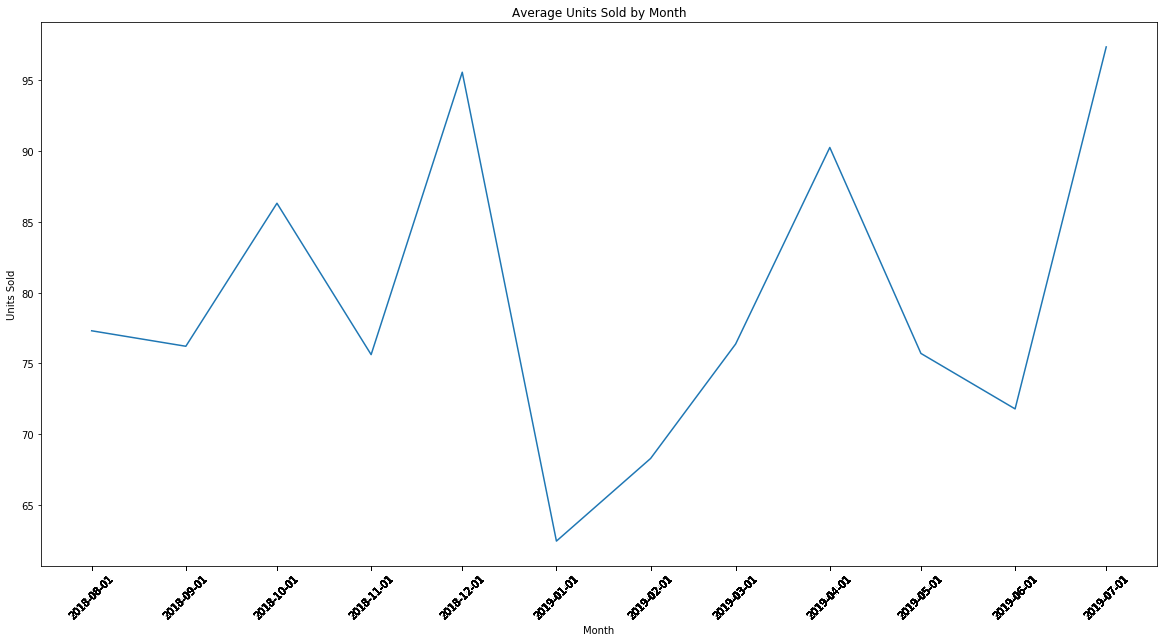

In [207]:
plt.figure(figsize=(20,10))
plt.plot(m_totals.groupby(['Month'])['Units Sold'].mean());
plt.title('Average Units Sold by Month');
plt.xlabel('Month');
plt.ylabel('Units Sold');
plt.xticks(m_totals['Month'], rotation=45);
plt.tick_params(labelsize=10);
plt.savefig("Avg. Cars Sold.png",edgecolor='k')


In [223]:
dealer_mean_sold = m_totals.groupby(['DealerName'])[['Units Sold']].mean()
dealer_mean_sold.reset_index(inplace=True)
#dealer_mean_sold

In [209]:
m_totals.groupby(['DealerName'])['Units Sold'].mean().describe()

count     24.000000
mean      76.743921
std       43.857448
min        8.857143
25%       51.475379
50%       75.750000
75%       96.437500
max      203.000000
Name: Units Sold, dtype: float64

In [210]:
lower_25 = m_totals.groupby(['DealerName'])['Units Sold'].mean().describe()['25%']
upper_75 = m_totals.groupby(['DealerName'])['Units Sold'].mean().describe()['75%']
num_1 = m_totals.groupby(['DealerName'])['Units Sold'].mean().describe()['max']-1
num_1_dealer = m_totals.groupby(['DealerName'])['Units Sold'].mean().sort_values(ascending=False).index[0]
num_1_dealer = "#1 Dealer: "+num_1_dealer
num_1_dealer

'#1 Dealer: Lehigh Valley Honda'

In [224]:
bin_edges = [0, lower_25, upper_75, num_1, 9999]
bin_names = ['low','medium','high', num_1_dealer]
dealer_mean_sold['Volume'] = pd.cut(dealer_mean_sold['Units Sold'], bin_edges, labels=bin_names)
dealer_mean_sold.rename(columns={'Units Sold':'Avg. Units Sold'}, inplace=True)
#dealer_mean_sold

In [212]:
m_totals = pd.merge(m_totals,dealer_mean_sold, on='DealerName')
m_totals

,DealerName,Month,Fresh Walk Ins,Internet Leads,Internet Set,Internet Show,Internet Sold,Phone Leads,Phone Set,Phone Show,Phone Sold,Showroom Visits,Units Sold,Avg. Response Time,Closing Percent,Avg. Units Sold,Volume
0,Abeloff Buick GMC,2019-01-01,90,233,46,32,18,141,34,30,21,209,67,21.085000,0.323275,97.000000,high
1,Abeloff Buick GMC,2019-02-01,131,362,107,62,45,106,30,19,23,301,116,43.042500,0.400450,97.000000,high
2,Abeloff Buick GMC,2019-03-01,134,368,101,56,29,263,54,33,24,296,105,23.350000,0.355400,97.000000,high
3,Abeloff Buick GMC,2019-04-01,165,428,123,90,48,325,49,33,37,374,137,31.924000,0.366520,97.000000,high
4,Abeloff Buick GMC,2019-05-01,152,335,79,54,35,225,59,40,37,344,127,21.740000,0.370375,97.000000,high
5,Abeloff Buick GMC,2019-06-01,34,60,14,10,6,42,9,5,7,72,30,35.250000,0.416700,97.000000,high
6,Abeloff Nissan,2019-01-01,96,234,65,46,37,66,31,20,12,228,86,68.577500,0.377550,79.500000,medium
7,Abeloff Nissan,2019-02-01,105,341,78,48,31,86,47,27,9,252,79,47.047500,0.315900,79.500000,medium
8,Abeloff Nissan,2019-03-01,131,357,73,47,34,92,37,23,17,262,90,7.750000,0.340225,79.500000,medium
9,Abeloff Nissan,2019-04-01,145,486,100,55,33,103,49,34,20,304,108,10.838000,0.355800,79.500000,medium


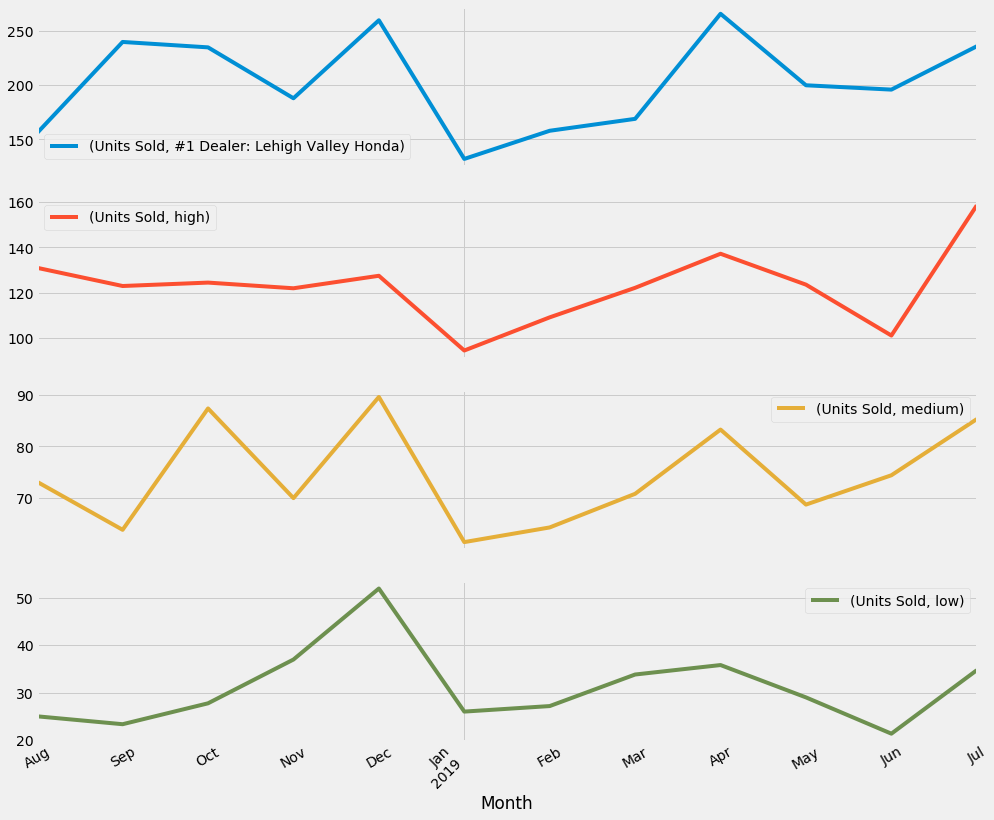

In [298]:
plot = m_totals.groupby(['Month','Volume'])[['Units Sold']].mean()\
    .unstack(level=1).sort_index(axis=1, ascending=False)\
    .plot(kind='line', subplots=True, figsize=(15,15), grid=True);

plt.xticks(rotation=45);
plt.savefig('Average Units Sold by Volume.png')

In [250]:
m_totals.dtypes

DealerName                    object
Month                 datetime64[ns]
Fresh Walk Ins                 int64
Internet Leads                 int64
Internet Set                   int64
Internet Show                  int64
Internet Sold                  int64
Phone Leads                    int64
Phone Set                      int64
Phone Show                     int64
Phone Sold                     int64
Showroom Visits                int64
Units Sold                     int64
Avg. Response Time           float64
Closing Percent              float64
Avg. Units Sold              float64
Volume                      category
dtype: object

In [267]:
m_totals.set_index('Month', inplace=True)

In [288]:
m_totals['DealerName'].unique().tolist()

['Abeloff Buick GMC',
 'Abeloff Nissan',
 'Cadillac of Fayetteville',
 'Con Paulos',
 'Gallagher',
 'John Sauder Ephrata',
 'John Sauder New Holland',
 'Lehigh Valley Acura',
 'Lehigh Valley Honda',
 'Lehigh Valley Hyundai',
 'Lumberton CBGC',
 "Maguire's Ford Duncannon",
 "Maguire's Ford Hershey",
 "Maguire's Nissan",
 'Mercedes-Benz of Lehigh Valley',
 'Porsche Lehigh Valley',
 'Roberts Auto Center',
 'Roberts DCJR',
 'Roberts Ford Lincoln',
 'Springfield Ford Lincoln',
 'Steven Kia',
 'Steven Nissan',
 'Steven Toyota',
 'Thrifty']

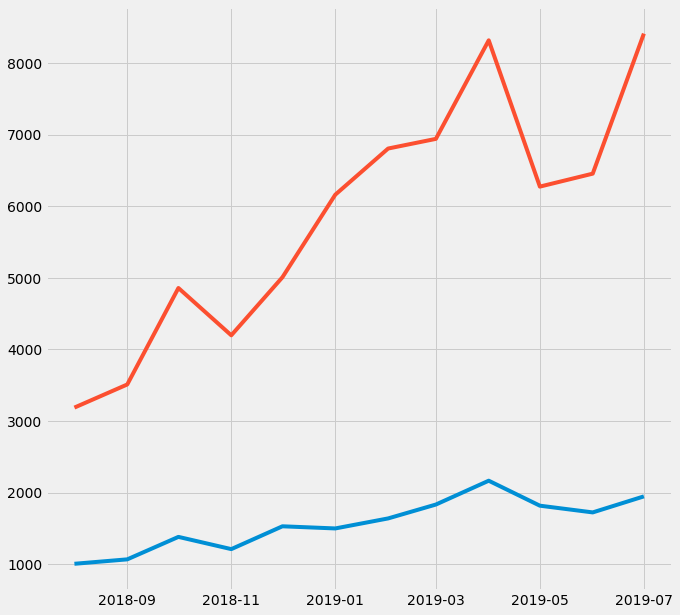

In [299]:
plt.figure(figsize=(10,10))
plt.plot(m_totals.groupby(['Month'])[['Units Sold','Internet Leads']].sum());

In [303]:
abby_clients = ['Abeloff Buick GMC',
                'Abeloff Nissan',
                'Thrifty',
                'Roberts Auto Center',
                'Roberts DCJR',
                'Roberts Ford Lincoln',
                'Con Paulos',
               ]
fig = plt.figure()

for client in abby_clients:
    ply.splot(m_totals[m_totals['DealerName']==client]['Units Sold'])
    
    

NameError: name 'ply' is not defined

<Figure size 432x288 with 0 Axes>

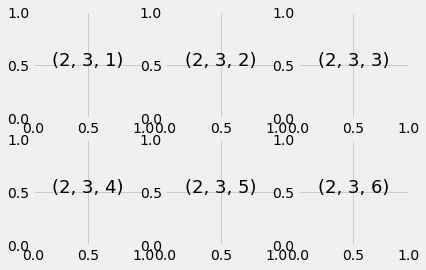

In [300]:
for i in range(1, 7):
